Import libraries

In [21]:
import tensorflow as tf
from keras.utils import image_dataset_from_directory

# Part 1 - Data Preprocessing

preprocessing the training set

In [22]:
# I found that Keras had depracated the ImageDataGenerator class. A few minutes of research revealed that had been replaced with "image_dataset_from_directory" function.

# Load training dataset from directory
training_set = tf.keras.utils.image_dataset_from_directory(
   'C:/Users/henry/Desktop/Personal/Training/Project/Medical-X-Ray-Image-Classifier-Pneumonia-Detection/chest_xray/train',
    labels='inferred',                 # Infer labels based on subdirectory names
    label_mode='binary',               # Binary classification
    image_size=(64, 64),               # Resize all images to 64x64
    batch_size=32,                     # Batch size of 32
    shuffle=True                       # Shuffle dataset
)

# Data augmentation layers (to replace ImageDataGenerator transformations)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),         # Rescale pixel values to [0, 1], this applies feature scaling to each pixel by dividing their value by 255. we already know that each pixel takes a value of 255, so by dividing all the pixels by 255, we get all pixels values between 0 and 1 which is just like a normalization.
    tf.keras.layers.RandomFlip("horizontal"),  # Apply horizontal flipping
    tf.keras.layers.RandomRotation(0.3),       # Simulate shear transformations
    tf.keras.layers.RandomZoom(0.3)            # Apply zoom transformations
])


Found 5216 files belonging to 2 classes.


preprocessing the test set

In [23]:
# Load the test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/henry/Desktop/Personal/Training/Project/Medical-X-Ray-Image-Classifier-Pneumonia-Detection/chest_xray/test',
    labels='inferred',                 # Infer labels from subdirectory names
    label_mode='binary',               # Binary classification
    image_size=(64, 64),               # Resize all images to 64x64
    batch_size=32,                     # Batch size of 32
    shuffle=False                      # No shuffling for test dataset
)

# Apply rescaling to normalize pixel values (equivalent to rescale=1./255)
normalization_layer = tf.keras.layers.Rescaling(1./255)

Found 624 files belonging to 2 classes.


# Part 2 - Building the CNN

Initialising the CNN

In [24]:
cnn = tf.keras.Sequential()

Step 1 - Convolution

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 2 - Pooling

In [26]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding a second layers to the CNN

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Step 3 - Flattening

In [28]:
cnn.add(tf.keras.layers.Flatten())

Step 4 - Full Connection

In [29]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Step 5 - Output Layer

In [30]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the CNN

Compiling the CNN

In [31]:
cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the CNN

In [32]:
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.8249 - loss: 10.5751 - val_accuracy: 0.7580 - val_loss: 0.7018
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9624 - loss: 0.1119 - val_accuracy: 0.7965 - val_loss: 0.6842
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9639 - loss: 0.0933 - val_accuracy: 0.7516 - val_loss: 0.9743
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9735 - loss: 0.0712 - val_accuracy: 0.7388 - val_loss: 1.1958
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9803 - loss: 0.0483 - val_accuracy: 0.7708 - val_loss: 1.0712
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9880 - loss: 0.0300 - val_accuracy: 0.7708 - val_loss: 1.2270
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9922 - loss: 0.0250 - val_accuracy: 0.7516 - val_loss: 1.6828
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9933 - loss: 0.0186 - v

In [33]:
# Part 4 - Evaluating the model's performance

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


<Figure size 600x600 with 0 Axes>

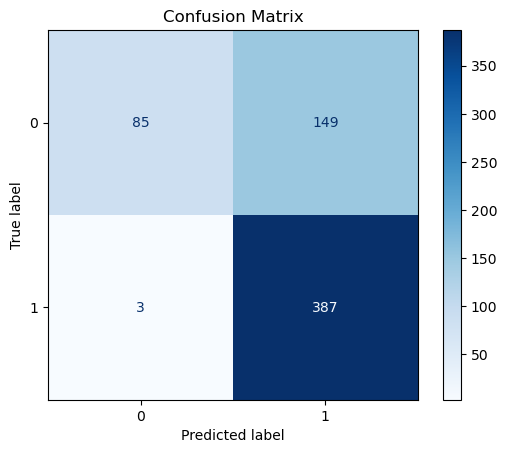

Classification Report:
               precision    recall  f1-score   support

      Normal       0.97      0.36      0.53       234
   Pneumonia       0.72      0.99      0.84       390

    accuracy                           0.76       624
   macro avg       0.84      0.68      0.68       624
weighted avg       0.81      0.76      0.72       624



In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt


# Get true labels and predictions
true_labels = np.concatenate([y for x, y in test_set], axis=0)
predictions = cnn.predict(test_set)
predicted_labels = (predictions > 0.6).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot confusion matrix
plt.figure(figsize=(6,6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=['Normal', 'Pneumonia'])
print("Classification Report:\n", report)